# k-Nearest Neighbors (k-NN) Algorithm

k-Nearest Neighbors (k-NN) is a fundamental machine learning algorithm used for both classification and regression. It's part of instance-based learning methods and is known for its simplicity and effectiveness.

## Characteristics

- **Simple and Intuitive:** Easy to understand and implement.
- **No Explicit Training Phase:** Directly uses the training data at prediction time.
- **Non-Parametric:** Makes no assumptions about the data distribution.

## How It Works

1. **Selecting 'k':** Choose the number of nearest neighbors to consider.
2. **Distance Calculation:** Compute the distance between the new point and existing points using metrics like Euclidean or Manhattan distance.
3. **Making Predictions:**
   - **Classification:** Classify based on the majority class of the 'k' neighbors.
   - **Regression:** Predict using the average of the neighbors' values.

## Applications and Limitations

- **Widely Used:** In recommender systems, image classification, and more.
- **Limitations:** Slows down with large datasets and is sensitive to irrelevant features and data scale.


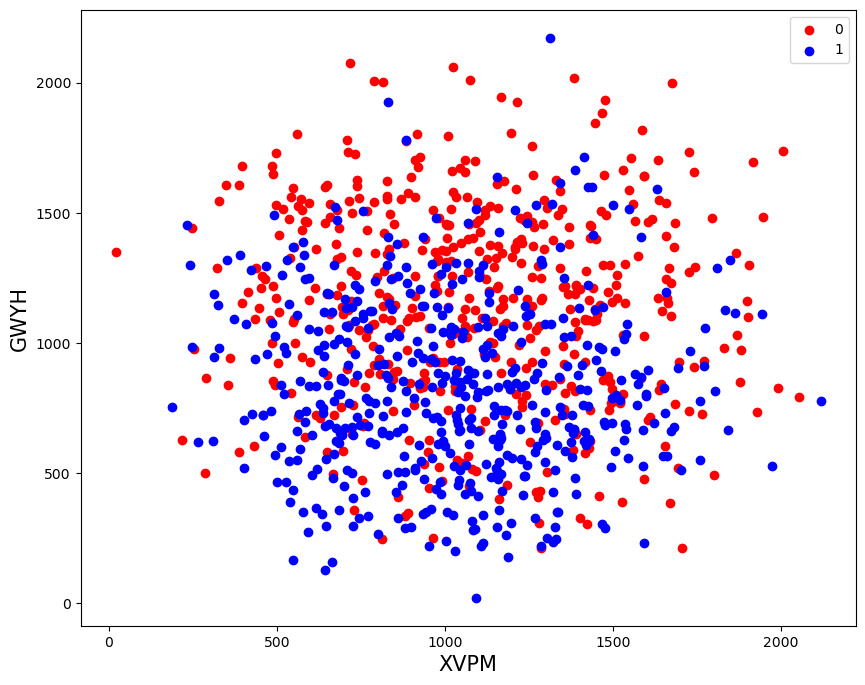

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the new dataset
data = pd.read_csv('~/Downloads/KNN_Project_Data.txt', sep=",")

# Define the status categories and their corresponding colors
Status = [0,1]
colors = ["red", "Blue"]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
for species, color in zip(Status, colors):
    temp_df = data[data["TARGET CLASS"] == species]  # Use species variable here
    ax.scatter(temp_df.XVPM,
               temp_df.GWYH,
               c=color,
               label=species)  # Use species for the label

# Set labels and legend
ax.set_xlabel("XVPM", fontsize=15)
ax.set_ylabel("GWYH", fontsize=15)
ax.legend()

plt.show()


In [13]:
data

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1343.060600,1289.142057,407.307449,567.564764,1000.953905,919.602401,485.269059,668.007397,1124.772996,2127.628290,0
996,938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,379.264597,567.200545,1
997,921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912,1
998,1157.069348,602.749160,1548.809995,646.809528,1335.737820,1455.504390,2788.366441,552.388107,1264.818079,1331.879020,1


In [2]:
from sklearn.model_selection import train_test_split

X = data[["XVPM",
          "GWYH"]].to_numpy()

y = data["TARGET CLASS"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=1)

In [3]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))


In [4]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [5]:
# Test the k_nearest_neighbors function
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([757.19136715, 679.70141601]), 0, 13.826993343075975],
 [array([724.26041918, 676.95491008]), 1, 46.78222330359123],
 [array([736.71993795, 716.82211908]), 1, 48.1413804889984],
 [array([772.64822442, 732.35827013]), 1, 49.68923817662009],
 [array([813.91413129, 654.44409302]), 1, 51.64656439823219]]

In [6]:
# Show the true label 
y_test[-1]

1

In [7]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [8]:
# Test our function 
KNN_Predict(X_test[20], X_train, y_train, 5)

1

In [9]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

In [10]:
# Test our function
classification_error(X_test, y_test, X_train, y_train, 7)

0.33636363636363636

In [11]:
possible_k = [k for k in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

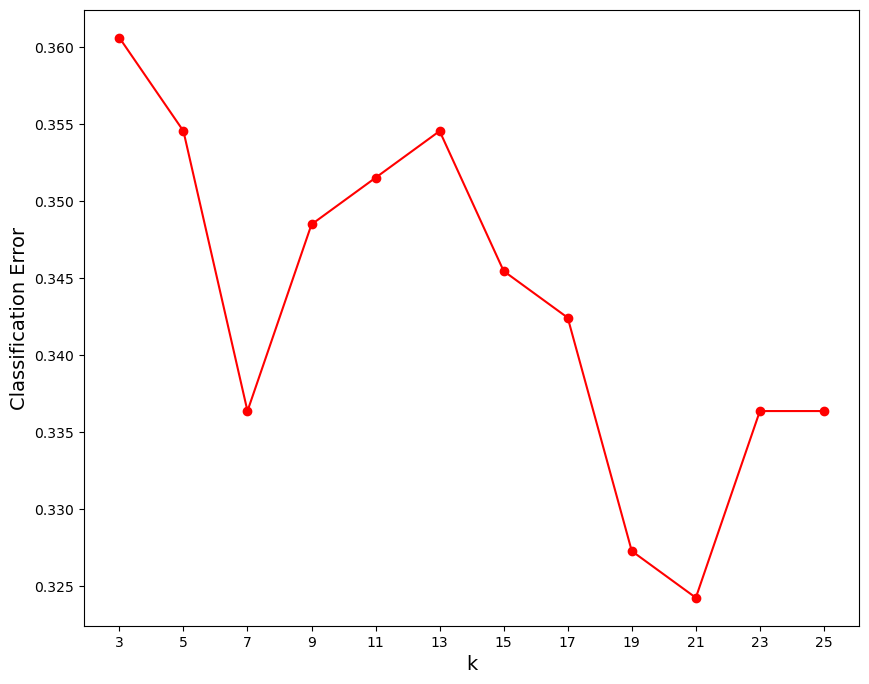

In [12]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()